<a href="https://colab.research.google.com/github/lisanyambere/lisanyambere/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predicting data sciencetist salaries for the period 2020-2023

In [ ]:
##Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
##Importing the dataset
df=pd.read_csv('/content/drive/MyDrive/ds_salaries.csv')

In [ ]:
##Data exploration
df.head()  #to see the first 5 rows of the data


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [ ]:
df.info() #check column names and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary_in_usd       3755 non-null   int64 
 5   employee_residence  3755 non-null   object
 6   remote_ratio        3755 non-null   object
 7   company_location    3755 non-null   object
 8   company_size        3755 non-null   object
dtypes: int64(2), object(7)
memory usage: 264.1+ KB


In [ ]:
#changing work year to datetime format
df['work_year']=pd.to_datetime(df['work_year'],format='%Y')

In [ ]:
#dropping salary and salary currency columns to work with a standard currency
df=df.drop(['salary','salary_currency'],axis=1)

In [ ]:
df.shape #to check dimension of the dataset


(3755, 9)

In [ ]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size'],
      dtype='object')

In [ ]:
##checking for missing values
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [ ]:
##checking for duplicates
df.duplicated().sum()

1179

In [ ]:
#checking unique values of categorical  variables
df.experience_level.unique() # There are 4 experience levels

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

In [ ]:
df.employment_type.unique() #There are 4 employment categories

array(['FT', 'CT', 'FL', 'PT'], dtype=object)

In [ ]:
df.company_location.unique()

array(['ES', 'US', 'CA', 'DE', 'GB', 'NG', 'IN', 'HK', 'NL', 'CH', 'CF',
       'FR', 'FI', 'UA', 'IE', 'IL', 'GH', 'CO', 'SG', 'AU', 'SE', 'SI',
       'MX', 'BR', 'PT', 'RU', 'TH', 'HR', 'VN', 'EE', 'AM', 'BA', 'KE',
       'GR', 'MK', 'LV', 'RO', 'PK', 'IT', 'MA', 'PL', 'AL', 'AR', 'LT',
       'AS', 'CR', 'IR', 'BS', 'HU', 'AT', 'SK', 'CZ', 'TR', 'PR', 'DK',
       'BO', 'PH', 'BE', 'ID', 'EG', 'AE', 'LU', 'MY', 'HN', 'JP', 'DZ',
       'IQ', 'CN', 'NZ', 'CL', 'MD', 'MT'], dtype=object)

In [ ]:
df.company_size.unique() #company sizes are categorized into 3

array(['L', 'S', 'M'], dtype=object)

In [ ]:
df.remote_ratio.unique()

array(['Remote work', 'On-Site', 'Hybrid'], dtype=object)

In [ ]:
df.job_title.unique()

array(['Principal Data Scientist', 'ML Engineer', 'Data Scientist',
       'Applied Scientist', 'Data Analyst', 'Data Modeler',
       'Research Engineer', 'Analytics Engineer',
       'Business Intelligence Engineer', 'Machine Learning Engineer',
       'Data Strategist', 'Data Engineer', 'Computer Vision Engineer',
       'Data Quality Analyst', 'Compliance Data Analyst',
       'Data Architect', 'Applied Machine Learning Engineer',
       'AI Developer', 'Research Scientist', 'Data Analytics Manager',
       'Business Data Analyst', 'Applied Data Scientist',
       'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer',
       'Head of Data', 'Data Science Manager', 'Data Manager',
       'Machine Learning Researcher', 'Big Data Engineer',
       'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer',
       'Director of Data Science', 'Machine Learning Scientist',
       'MLOps Engineer', 'AI Scientist', 'Autonomous Vehicle Technician',
       'Applied Machine Learning Sc

In [ ]:
df["job_title"]=df["job_title"].replace({"Applied Scientist":"Applied Data Scientist","ML Engineer":"Machine Learning Engineer"}) #correcting job titles

In [ ]:
df['remote_ratio']=df['remote_ratio'].replace({0:'On-Site',100:'Remote work',50:'Hybrid'}) #replacing the remote ratio with categories

In [ ]:
df.describe() #summary statistics of the numerical variables

,work_year,salary_in_usd
count,3755.000000,3755.000000
mean,2022.373635,137570.389880
std,0.691448,63055.625278
min,2020.000000,5132.000000
25%,2022.000000,95000.000000
50%,2022.000000,135000.000000
75%,2023.000000,175000.000000
max,2023.000000,450000.000000


<Axes: xlabel='work_year'>

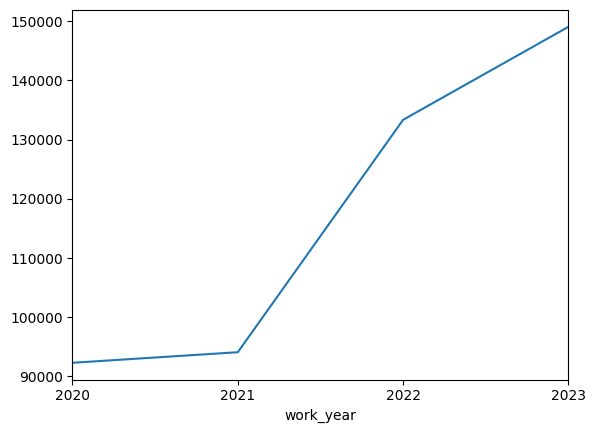

In [ ]:
##Plotting the average salary across the work year
df.groupby('work_year')['salary_in_usd'].mean().plot(kind='line') #salaries are increasing gradually each year

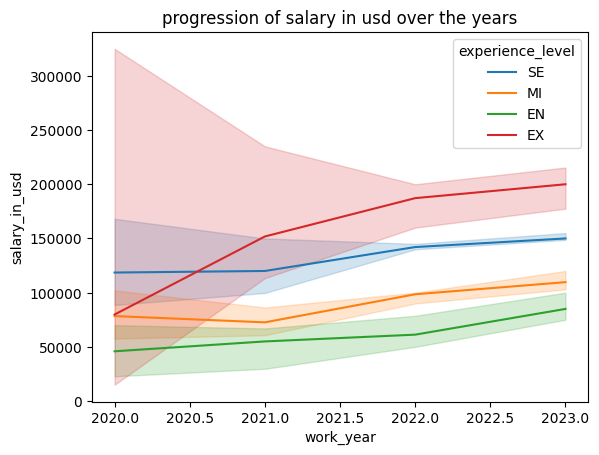

In [ ]:
##plotting the average salary in experience levels between 2020-2023
sns.lineplot(data=df ,x="work_year",y="salary_in_usd",estimator=np.median,hue="experience_level")
plt.title("progression of salary in usd over the years")
plt.show()


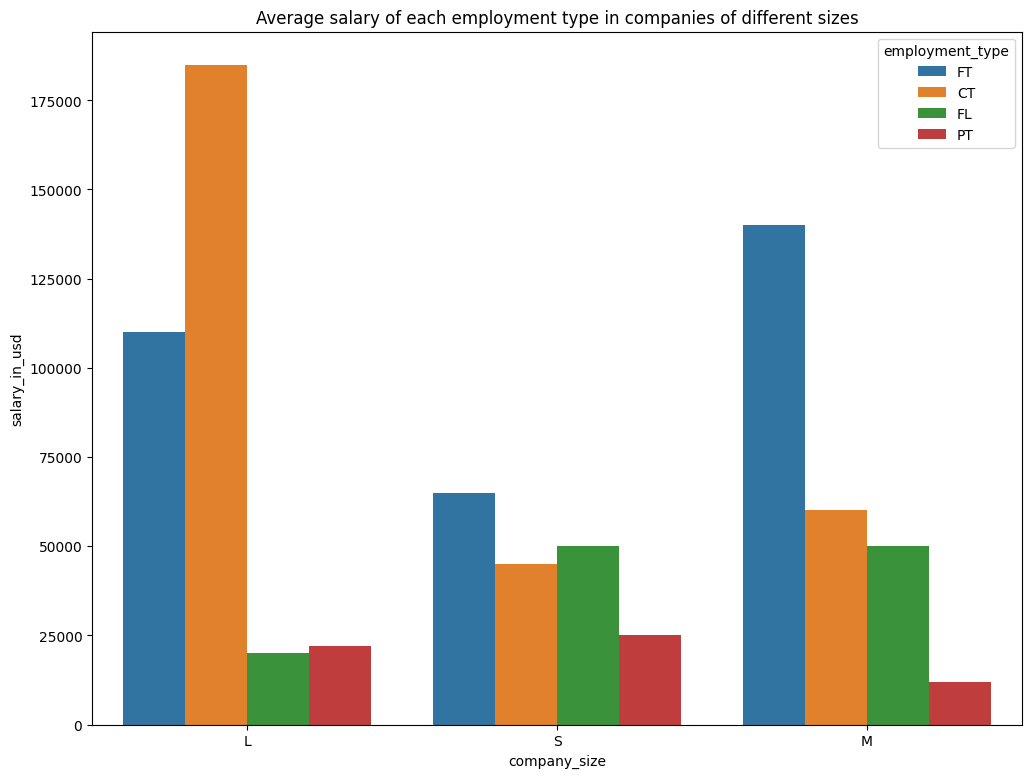

In [ ]:
##plotting the average salary of employment types in different companies
plt.figure(figsize=(12,9))
sns.barplot(data=df,x="company_size",y="salary_in_usd",hue="employment_type",estimator=np.median,errorbar=None)
plt.title("Average salary of each employment type in companies of different sizes")
plt.show()


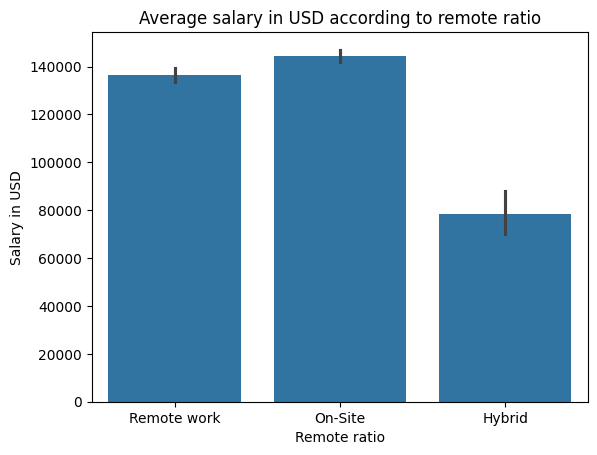

In [ ]:
##plotting the average salary against remote ratio
sns.barplot(x='remote_ratio',y='salary_in_usd',data=df)
plt.title('Average salary in USD according to remote ratio')
plt.xlabel('Remote ratio')
plt.ylabel('Salary in USD')
plt.show()

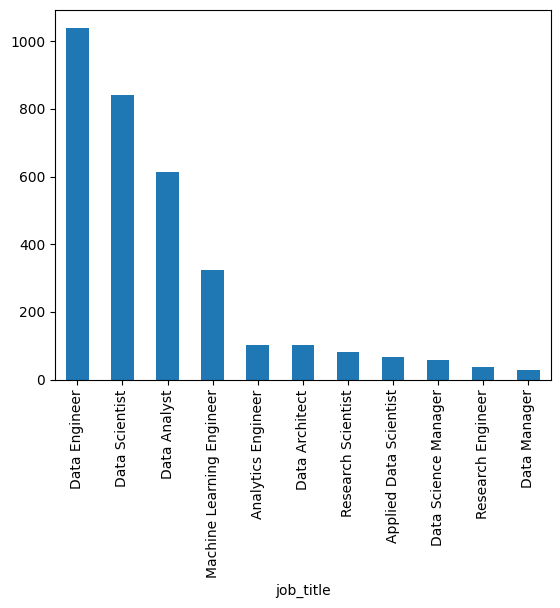

In [ ]:
##Checking the top 10 most common job titles
top_10=df.job_title.value_counts()[:11]
top_10.plot(kind = "bar")
plt.show() #Data engineers are the most common which indicates the demand, data scientists and data analysts follow right on

<Axes: xlabel='company_location'>

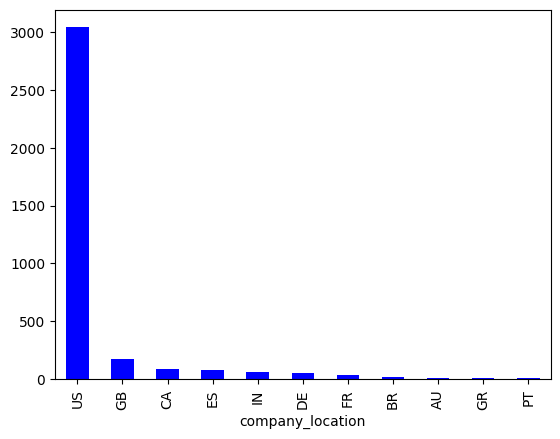

In [ ]:
##Where are the top 10 companies with data talents
top_10_loc=df.company_location.value_counts()[:11]
top_10_loc.plot(kind="bar",color="blue")

In [ ]:
##correlation
numerical=

Modelling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
#constructing x ad y
x=df.drop(['salary','salary_currency','salary_in_usd'],axis=1)
y=df['salary_in_usd']

In [ ]:
##preprocessing
categorical_cols=['experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size','remote_ratio']
numerical_cols=['work_year']
preprocessor = ColumnTransformer( #scaling and one hot encoding function
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])
x_processed=preprocessor.fit_transform(x)

In [ ]:
##Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_processed, y, test_size=0.2, random_state=103)

In [ ]:
##Linear regression
linear_regr=LinearRegression()
linear_regr.fit(x_train,y_train)
#predicting
y_pred_regression = linear_regr.predict(x_test)
#RMSE
print('Linear Regression RMSE:', mean_squared_error(y_test, y_pred_regression, squared=False))
#Rsquared
print('Rsquared:',r2_score(y_test, y_pred_regression))

Linear Regression RMSE: 48228.403795317725
Rsquared: 0.40427558357872007


In [ ]:
##Random forest model
rf = RandomForestRegressor(n_estimators=100, random_state=234)
rf.fit(x_train, y_train)

# Predicting
y_pred_rf = rf.predict(x_test)
#RMSE
print('Random Forest RMSE:', mean_squared_error(y_test, y_pred_rf, squared=False))
#Rsquared
print('Rsquared:',r2_score(y_test, y_pred_rf))

Random Forest RMSE: 46490.54031618333
Rsquared: 0.44643476097947266


In [ ]:
##KNN model
knn = KNeighborsRegressor(n_neighbors=3)  #assuming k=3
knn.fit(x_train, y_train)

# Predicting
y_pred_knn = knn.predict(x_test)
#RMSE
print('KNN RMSE:', mean_squared_error(y_test, y_pred_knn, squared=False))
#Rsquared
print('Rsquared:',r2_score(y_test, y_pred_knn))

KNN RMSE: 51266.52676247405
Rsquared: 0.3268568746141025
